In [4]:
# install dieharder
!apt-get install --reinstall dieharder

# `hello-ready` test
!dieharder --version

!mkdir ./sample_data/dieharder/
# a better `hello-ready` test: -a : runs all the tests with standard/default options to create a report
#!dieharder -a
!dieharder -a >> ./sample_data/dieharder/out.txt & # run at the background

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 1 reinstalled, 0 to remove and 49 not upgraded.
Need to get 184 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dieharder amd64 3.31.1.2-1build1 [184 kB]
Fetched 184 kB in 2s (106 kB/s)
(Reading database ... 123658 files and directories currently installed.)
Preparing to unpack .../dieharder_3.31.1.2-1build1_amd64.deb ...
Unpacking dieharder (3.31.1.2-1build1) over (3.31.1.2-1build1) ...
Setting up dieharder (3.31.1.2-1build1) ...
Processing triggers for man-db (2.10.2-1) ...
dieharder: invalid option -- '-'
# Verbose is now 0
#=============================================================================#
#            dieharder version 3.31.1 Copyright 2003 Robert G. Brown          #
#=============================================================================#

Usage

In [5]:
import re

# Initialize an empty list to hold the extracted data
extracted_data = []

# Open the log file
with open('./sample_data/dieharder/out.txt', 'r') as file:
    for line in file:
        # Use regex to match the desired line format
        match = re.match(r'^\s*(\S+)\s*\|\s*(\d+)\s*\|\s*(\d+)\s*\|\s*(\d+)\s*\|\s*([\d\.]+)\s*\|\s*(\S+)', line)
        if match:
            # Extract the matched groups and append to the list:
            #           \S+ {string}     | \d+ {digits} | \d+ {digits} | \d+ {digits} | [\d\.]+ {floats} | \S+ {string}
            # example:  diehard_birthdays|   0          |         100  |        100   |        0.72433123|     PASSED
            test_name = match.group(1)
            ntup = int(match.group(2))
            tsamples = int(match.group(3))
            psamples = int(match.group(4))
            p_value = float(match.group(5))
            assessment = match.group(6)

            extracted_data.append({
                'test_name': test_name,
                'ntup': ntup,
                'tsamples': tsamples,
                'psamples': psamples,
                'p_value': p_value,
                'assessment': assessment,
            })

# Print the extracted data
for item in extracted_data:
    print(item)


{'test_name': 'diehard_birthdays', 'ntup': 0, 'tsamples': 100, 'psamples': 100, 'p_value': 0.61505787, 'assessment': 'PASSED'}
{'test_name': 'diehard_operm5', 'ntup': 0, 'tsamples': 1000000, 'psamples': 100, 'p_value': 0.18786146, 'assessment': 'PASSED'}
{'test_name': 'diehard_rank_32x32', 'ntup': 0, 'tsamples': 40000, 'psamples': 100, 'p_value': 0.64629053, 'assessment': 'PASSED'}
{'test_name': 'diehard_rank_6x8', 'ntup': 0, 'tsamples': 100000, 'psamples': 100, 'p_value': 0.82547117, 'assessment': 'PASSED'}
{'test_name': 'diehard_bitstream', 'ntup': 0, 'tsamples': 2097152, 'psamples': 100, 'p_value': 0.41348633, 'assessment': 'PASSED'}
{'test_name': 'diehard_opso', 'ntup': 0, 'tsamples': 2097152, 'psamples': 100, 'p_value': 0.16885215, 'assessment': 'PASSED'}
{'test_name': 'diehard_oqso', 'ntup': 0, 'tsamples': 2097152, 'psamples': 100, 'p_value': 0.68201549, 'assessment': 'PASSED'}
{'test_name': 'diehard_dna', 'ntup': 0, 'tsamples': 2097152, 'psamples': 100, 'p_value': 0.23479963, 'a

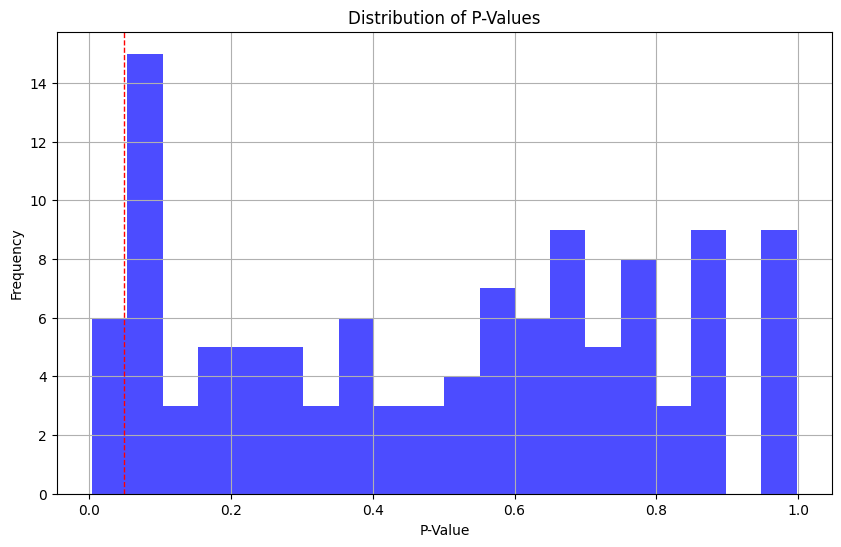

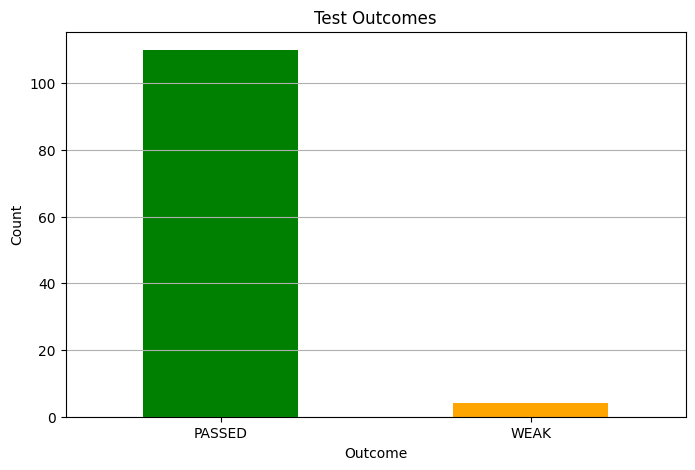

Extracted sample_sizes (unique and sorted): [100, 4000, 8000, 10000, 12000, 40000, 50000, 100000, 200000, 256000, 1000000, 2097152, 5000000, 10000000, 15000000, 51200000, 65000000]
DataFrame after adding sample sizes:
            test_name  ntup  tsamples  psamples   p_value assessment  \
0   diehard_birthdays     0       100       100  0.615058     PASSED   
1      diehard_operm5     0   1000000       100  0.187861     PASSED   
2  diehard_rank_32x32     0     40000       100  0.646291     PASSED   
3    diehard_rank_6x8     0    100000       100  0.825471     PASSED   
4   diehard_bitstream     0   2097152       100  0.413486     PASSED   

   sample_sizes  
0         100.0  
1        4000.0  
2        8000.0  
3       10000.0  
4       12000.0  


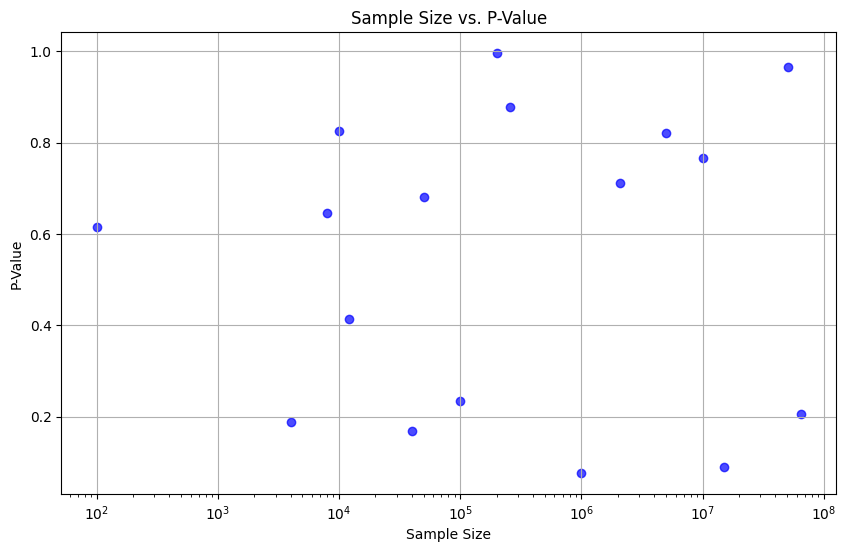

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = extracted_data
# Create a DataFrame
df = pd.DataFrame(data)

# Plotting P-Value Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['p_value'], bins=20, color='blue', alpha=0.7)
plt.axvline(0.05, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of P-Values')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Bar plot of test outcomes
outcomes_count = df['assessment'].value_counts()
plt.figure(figsize=(8, 5))
outcomes_count.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Test Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Assuming df is already defined and contains the necessary columns

# Extract 'tsamples', ensuring they are unique and sorted
sample_sizes = sorted(set(df['tsamples'].tolist()))  # Unique and sorted list
print(f"Extracted sample_sizes (unique and sorted): {sample_sizes}")

# Add sample sizes to the DataFrame as a new column (if needed)
# Note: This will create NaN for other rows if the lengths do not match
df['sample_sizes'] = pd.Series(sample_sizes)

# Check if 'sample_sizes' is successfully added
print("DataFrame after adding sample sizes:")
print(df.head())  # Print the first few rows to verify

# Proceed with plotting if 'sample_sizes' is in df
if 'sample_sizes' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['sample_sizes'], df['p_value'], color='blue', alpha=0.7)
    plt.title('Sample Size vs. P-Value')
    plt.xlabel('Sample Size')
    plt.ylabel('P-Value')
    plt.xscale('log')  # Using a logarithmic scale for sample sizes
    plt.grid()
    plt.show()
else:
    print("Column 'sample_sizes' not found in the DataFrame. Please check the earlier steps.")
